## Initialization

In [1]:
# tutorial.ipynb
# import some useful librairies
import os  # to use some OS commands
from pathlib import Path  # to handle Paths

import matplotlib.dates as mdates  # to handle dates in plots
import matplotlib.pyplot as plt  # for plot
import matplotlib.ticker as mtick  # to customize tickers
import numpy as np  # for math
import pandas as pd  # "excel but better"
from decouple import AutoConfig  # to get info from .env file
from scipy.interpolate import interp1d  # to interpolate 1d function

In [2]:
# to auto-reload the imports
# if we change something in our functions
%load_ext autoreload
%autoreload 2

%load_ext nb_black

<IPython.core.display.Javascript object>

# KAPpaxsim tutorial

This tutorial is a quickstart guide on how to install and use **KAPpaxsim**\
**KAPpaxsim** is a python module designed to modelize and simulate the passenger\
flows in various KAP terminal buildings.

## Setup and Install
**(see README.md)**

Detailed start guide

1. Install & start [Anaconda](https://www.anaconda.com/products/individual "Anaconda download") <-
to install and manage python environments
2. Download & unzip [source code](https://github.com/AntoineGlacet/KAPpaxsim/archive/refs/heads/main.zip "download code as a zip") in your project directory
3. Install the conda env from template
    1. locate environment.yml in root of downloaded code
    2. open a conda command prompt and go to that directory (root)
    3. execute `conda env create --name myenv --file environment.yml
4. install src (pip install -e . in conda terminal from root)
5. run the tutorial notebook /notebook/tutorial.ipynb



## Import data from sharepoint

In [3]:
from src.utils.sharepoint import get_ADRM_param_full, get_schedule_forecast_FY19_25

<IPython.core.display.Javascript object>

In [4]:
# just use convenient functions to directly download the data from Sharepoint
# to local folder /data/raw
# .env file with Sharepoint secret password is required
# for security, this file is never uploaded to github
# please send me (Antoine) en email to get it

get_ADRM_param_full()
get_schedule_forecast_FY19_25()

[Ok] file has been downloaded: /home/antoine/projects/KAPpaxsim/KAPpaxsim/src/utils/../../data/raw/ADRM_param_full.xlsx
[Ok] file has been downloaded: /home/antoine/projects/KAPpaxsim/KAPpaxsim/src/utils/../../data/raw/FY2019_FY2025 merge.xlsx


<IPython.core.display.Javascript object>

## Run a first simulation!

### generate Pax show up and counter allocation

In [9]:
# import the functions from KAPpaxsim (src)
from src.utils.profiles import generate_dep_Pax_Counters
from src.utils.profiles import generate_arr_Pax

<IPython.core.display.Javascript object>

In [12]:
# look into the functions to check-out some options!
df_Pax_dep, df_Counters = generate_dep_Pax_Counters(target_peak=3580, terminal="T1")
# df_pax_arr = generate_arr_Pax(target_peak=3580, terminal="T1")

Pax and counter generation...:   0%|                                                              | 0/2 [00:00<?, ?it/s]

         STA     STD
2019     NaN  3580.0
2020  1640.0  2201.0
2021  2495.0  3333.0
2022  2730.0  3097.0
2023  3182.0  3768.0
2024  3312.0  3759.0
2025  3485.0  3880.0
chosen reference year: 2019


Pax and counter generation...:  50%|███████████████████████████                           | 1/2 [00:09<00:09,  9.84s/it]

         STA     STD
2019     NaN  3580.0
2020  1640.0  2201.0
2021  2495.0  3333.0
2022  2730.0  3097.0
2023  3182.0  3768.0
2024  3312.0  3759.0
2025  3485.0  3880.0
chosen reference year: 2019


Pax and counter generation...: 100%|██████████████████████████████████████████████████████| 2/2 [00:27<00:00, 13.84s/it]


<IPython.core.display.Javascript object>

In [8]:
df_Pax_dep

,Flight Number,time,Scheduled Time,Category
0,BX 0123,2020-10-13 05:30:04,2020-10-13 11:30:00,LCC
1,BX 0123,2020-10-13 05:34:49,2020-10-13 11:30:00,LCC
2,BX 0123,2020-10-13 05:51:09,2020-10-13 11:30:00,LCC
3,BX 0123,2020-10-13 06:01:56,2020-10-13 11:30:00,LCC
4,BX 0123,2020-10-13 06:10:06,2020-10-13 11:30:00,LCC
...,...,...,...,...
30487,RA 0412,2020-10-13 13:42:02,2020-10-13 14:30:00,LCC
30488,RA 0412,2020-10-13 13:48:03,2020-10-13 14:30:00,LCC
30489,RA 0412,2020-10-13 13:55:24,2020-10-13 14:30:00,LCC
30490,RA 0412,2020-10-13 14:05:10,2020-10-13 14:30:00,LCC


<IPython.core.display.Javascript object>

In [13]:
# write set results to Excel
writer = pd.ExcelWriter(
    r"\pax_list_terminal_show_up_2019.xlsx",
    engine="xlsxwriter",
)
df_Pax_dep.to_excel(writer, sheet_name="Pax_input")

writer.save()

<IPython.core.display.Javascript object>

In [ ]:
df_Counters

In [ ]:
df_pax_arr

### run the simulation

In [ ]:
# for the exemple, let's work with T1 arrivals for covid
# and T1 departures
from src.simfunc.KIX_T1a_covid import KIX_T1a_covid
from src.simfunc.KIX_T1d import KIX_T1d

In [ ]:
# look at the parameters of the function with alt+tab!
# KIX_T1d()
# KIX_T1a_covid()

In [ ]:
# create a dictionnary
# the Pt are in minutes !
dct_param = {
    "path": None,
    "df_Pax": df_Pax_dep,  # generated before
    "df_Counters": df_Counters,  # generated before
    "Pt_checkin_1step_counter": 100,  # Pt in seconds!
    "Pt_checkin_2step_counter": 80,
    "N_kiosk": 92,
    "Pt_kiosk": 90,
    "N_security_lanes": 16,
    "Pt_security_lanes": 14,
    "N_emigration_counter": 20,
    "Pt_emigration_counter": 23,
    "N_emigration_self": 23,
    "Pt_emigration_self": 28,
    "modern_pax_ratio": 0.1,
    "digital_pax_ratio": 0.05,
    "premium_pax_ratio": 0.05,
    "show_graph": True,
}

In [ ]:
# cool feature: unpack the dictionnary to pass
# the arguments to the function
(
    df_result,
    list_KPI_run,
    dct_hist_wait_time,
    dct_hist_queue_length,
) = KIX_T1d(**dct_param)

## Change some parameters

### allocation rule

In [ ]:
def minutes_to_hms(minutes):
    if np.isnan(minutes):
        hms = np.nan
    else:
        hms = "{0:s} {1:0=2d}:{2:0=2d}:{3:0=2d}".format(
            "2020-10-13",
            int((minutes % 1440) // 60),
            int(minutes % 60),
            int((minutes % 1) * 60),
        )
    return hms


# allocation rules, could be generalized easily with a few parameters
def current_rule(t):
    y = 0
    if 0.75 < t <= 2.5:
        y = 4
    if 0 < t <= 0.75:
        y = 1
    return y


def test_rule1(t):
    y = 0
    if 0.75 < t <= 3:
        y = 3
    if 0 < t <= 0.75:
        y = 1
    return y


def test_rule2(t):
    y = 0
    if 0.75 < t <= 3.5:
        y = 3
    if 0 < t <= 0.75:
        y = 1
    return y


def test_rule3(t):
    y = 0
    if 0.75 < t <= 4:
        y = 3
    if 0 < t <= 0.75:
        y = 1
    return y


def func(seats):
    y = 1.75 * max(4, seats // 60) + 1 * 0.75
    return y


def func1(seats):
    y = 2.25 * max(3, seats // 75) + 1 * 0.75
    return y


def func2(seats):
    y = 2.75 * max(3, seats // 90) + 1 * 0.75
    return y


def func3(seats):
    y = 3.25 * max(3, seats // 105) + 1 * 0.75
    return y


x = np.linspace(0, 5)
y = [current_rule(x) for x in x]
y1 = [test_rule1(x) for x in x]
y2 = [test_rule2(x) for x in x]
y3 = [test_rule3(x) for x in x]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax[0].plot(x, y, label="current rule")
# ax[0].plot(x, y1, label="test rule 1")
ax[0].plot(x, y2, label="test rule 3.5 hrs")
# ax[0].plot(x, y3, label="test rule 3")
ax[0].set_xlim((4, 0))
ax[0].set_ylim(bottom=0)
ax[0].set(
    xlabel="hour before STD",
    ylabel="counter number",
    yticks=[0, 1, 2, 3, 4],
)
ax[0].legend()


x = [20 * i for i in range(9, 50)]
y = [func(x) / x for x in x]
y1 = [func1(x) / x for x in x]
y2 = [func2(x) / x for x in x]
y3 = [func3(x) / x for x in x]

ax[1].plot(x, y, label="current rule")
# ax[1].plot(x, y1, label="test rule 1")
ax[1].plot(x, y2, label="test rule 3.5 hrs")
# ax[1].plot(x, y3, label="test rule 3")
ax[1].set(xlabel="seats", ylabel="counter.hour/seat")
ax[1].legend()

In [ ]:
# we define the kwargs for custom counter rule
kwargs_new_rule = {
    "start_time": 3.5,
    "onecounter_time": 0.75,
    "base_n_counter": 3,
    "seats_per_add_counter": 90,
}

_, df_Counters_new_rule = generate_dep_Pax_Counters(
    target_peak=3580,
    terminal="T1",
    custom_counter_rule=True,  # we tell the function to consider custom rule
    **kwargs_new_rule,  # we pass the dictionnary of kwargs
)

In [ ]:
# let's compare the total counters through the day for current vs new rule
dct_Counters = {
    "current": df_Counters,
    "new_rule": df_Counters_new_rule,
}

dct_plt = {
    "current": np.nan,
    "new_rule": np.nan,
}

for rule in dct_Counters.keys():
    dct_Counters[rule]["time"] = dct_Counters[rule].index
    dct_Counters[rule]["time"] = pd.to_datetime(
        dct_Counters[rule]["time"].apply(lambda x: minutes_to_hms(5 * x))
    )
    dct_plt[rule] = (
        dct_Counters[rule].set_index("time").resample("60S").ffill()[["total"]]
    )


# plot param
xmin = pd.to_datetime("2020-10-13 00:00:00")
xmax = pd.to_datetime("2020-10-14 00:00:00")
plt.rcParams.update({"figure.autolayout": True})
hours = mdates.HourLocator(interval=1)
half_hours = mdates.MinuteLocator(byminute=[0, 30], interval=1)
h_fmt = mdates.DateFormatter("%H:%M")

# create figure and plots
fig, ax = plt.subplots(figsize=(14, 5))
for rule in dct_Counters.keys():
    ax.plot(dct_plt[rule], label=rule)

# formatting
ax.set_xlim((xmin, xmax))
ax.set(ylabel="counters [unit]")
ax.set_xticks(dct_plt[rule].index.to_list())
ax.set_xticklabels(ax.get_xticks(), rotation=45, **{"horizontalalignment": "right"})
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_minor_locator(half_hours)
ax.legend(loc="upper left", frameon=False)

# scale y axis to leave more space
_, top = ax.get_ylim()
newtop = 1.20 * top
ax.set_ylim(bottom=0, top=newtop)

plt.show()

What I did in check-in BHS WG is to run simulation and see the impact on wait times, dwell time, EBS, BHS, etc...\
With this kind of changes

### Show-up profiles

#### base case profiles (from non-aero survey)

In [16]:
# get the paths to config
# get the path for references files
# do not bother with that right now

DOTENV_FILE_PATH = Path(os.getcwd()) / "../../data/secret/.env"
config = AutoConfig(search_path=DOTENV_FILE_PATH)
path_forecasts = (
    Path(os.getcwd()) / ".." / ".." / config("schedule_forecast_FY19_25_path")
)
path_show_up = Path(os.getcwd()) / ".." / ".." / config("ADRM_param_full_path")

<IPython.core.display.Javascript object>

In [17]:
# this is a copy paste from the show-up function (src.utils.profiles)
show_up_ter = pd.read_excel(
    path_show_up,
    sheet_name=r"terminal",
    header=1,
)
show_up_ter = show_up_ter.drop([0, 1], axis=0)
show_up_ter = show_up_ter.reset_index(drop=True)

# interpolation of show_up profiles and inverse functions
x = show_up_ter["time before STD"].to_numpy(dtype=float)

yFSC = show_up_ter["cumulative distribution FSC"].to_numpy(dtype=float)
yLCC = show_up_ter["cumulative distribution LCC"].to_numpy(dtype=float)
yEARLY = show_up_ter["cumulative distribution EARLY"].to_numpy(dtype=float)
yCHINA = show_up_ter["cumulative distribution CHINA"].to_numpy(dtype=float)

f_ter_FSC = interp1d(x, yFSC, kind="linear")
f_ter_LCC = interp1d(x, yLCC, kind="linear")
f_ter_EARLY = interp1d(x, yEARLY, kind="linear")
f_ter_CHINA = interp1d(x, yCHINA, kind="linear")

<IPython.core.display.Javascript object>

In [18]:
# dictionnarize to plot easily
# we should enhance the profile function with dictionnaries
dct_y = {
    "FSC": yFSC,
    "LCC": yLCC,
    "EARLY": yEARLY,
    "CHINA": yCHINA,
}

dct_f_ter = {
    "FSC": f_ter_FSC,
    "LCC": f_ter_LCC,
    "EARLY": f_ter_EARLY,
    "CHINA": f_ter_CHINA,
}

<IPython.core.display.Javascript object>

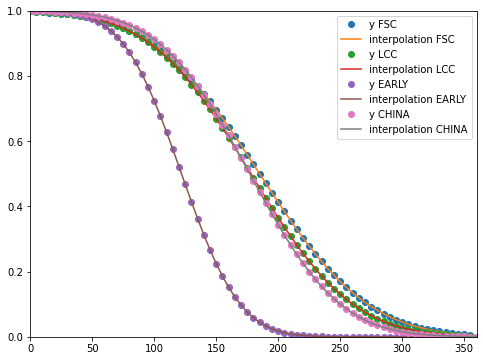

<IPython.core.display.Javascript object>

In [19]:
# let's plot
fig, ax = plt.subplots(figsize=(8, 6))

for type in dct_y.keys():
    ax.plot(x, dct_y[type], "o", label="y {}".format(type))
    ax.plot(x, dct_f_ter[type](x), label="interpolation {}".format(type))

ax.legend()
ax.set(xlim=(0, 360), ylim=(0, 1))
plt.show()

Those are the show-up profiles from non-aero survey.\
Let's try another profile where people show-up much later!

#### custom show-up profiles

In [ ]:
from scipy.stats import norm

In [ ]:
# create some parameters
kwargs_custom_show_up = {
    "loc_FSC": 100,  # like mean
    "scale_FSC": 33,  # like standard deviation
    "loc_LCC": 90,
    "scale_LCC": 30,
    "loc_CHINA": 120,
    "scale_CHINA": 40,
    "loc_EARLY": 60,
    "scale_EARLY": 20,
}

In [ ]:
category_list = ["FSC", "LCC", "CHINA", "EARLY"]

In [ ]:
dct_f_ter_custom_show_up = {
    "f_ter_{}".format(category): (
        lambda x, category=category: 1
        - norm.cdf(
            x,
            loc=kwargs_custom_show_up["loc_{}".format(category)],
            scale=kwargs_custom_show_up["scale_{}".format(category)],
        )
    )
    for category in category_list
}

In [ ]:
# let's plot
fig, ax = plt.subplots(figsize=(8, 6))

for function in dct_f_ter_custom_show_up.keys():
    ax.plot(
        x,
        dct_f_ter_custom_show_up[function](x),
        label="custom_show-up {}".format(function),
    )

for type in dct_y.keys():
    ax.plot(x, dct_f_ter[type](x), "--", label="base case show-up {}".format(type))

ax.legend()
ax.set(xlim=(0, 360), ylim=(0, 1))
plt.show()

In [ ]:
df_Pax_custom_show_up, _ = generate_dep_Pax_Counters(
    target_peak=3580,
    terminal="T1",
    custom_showup=True,
    **kwargs_custom_show_up,
)

In [ ]:
df_Pax_custom_show_up["Pax"] = 1
df_Pax_dep["Pax"] = 1

In [ ]:
df_Pax_custom_show_up.columns

In [ ]:
plt_custom_show_up = (
    df_Pax_custom_show_up.set_index("time", drop=False)["Pax"]
    .resample("5min")
    .agg(["sum"])
    .rolling(window=1, center=True)
    .mean()
    .dropna()
)

In [ ]:
plt_normal_show_up = (
    df_Pax_dep.set_index("time", drop=False)["Pax"]
    .resample("5min")
    .agg(["sum"])
    .rolling(window=1, center=True)
    .mean()
    .dropna()
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(plt_normal_show_up * 12, label="normal show-up (non aero survey)")
ax.plot(plt_custom_show_up * 12, label="custom show-up")

# plot param
xmin = pd.to_datetime("2020-10-13 00:00:00")
xmax = pd.to_datetime("2020-10-14 00:00:00")
plt.rcParams.update({"figure.autolayout": True})
hours = mdates.HourLocator(interval=1)
half_hours = mdates.MinuteLocator(byminute=[0, 30], interval=1)
h_fmt = mdates.DateFormatter("%H:%M")

# formatting
ax.set_xlim((xmin, xmax))
ax.set_xticks(plt_normal_show_up.index.to_list())
ax.set_xticklabels(ax.get_xticks(), rotation=45, **{"horizontalalignment": "right"})
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.xaxis.set_minor_locator(half_hours)
ax.legend(loc="upper left", frameon=False)

plt.show()

## Run an optimization loop
for a given traffic, we will find how many security lanes are required to be at optimum level of service

In [ ]:
df_Pax_opti, df_Counters_opti = generate_dep_Pax_Counters(
    target_peak=1000, terminal="T1"  # we take a small traffic for runtime...
)

In [ ]:
from src.utils.optimizers import custmin, custcallback
from src.simfunc.KIX_T1d import univariate_cost_function_generator_T1d_N

In [ ]:
# replace the df_Pax and df_Counters
dct_param_opti = dct_param.copy()
dct_param_opti["df_Pax"] = df_Pax_opti
dct_param_opti["df_Counters"] = df_Counters_opti

# deactivate graph plotting option
dct_param_opti["show_graph"] = False

# kwargs for the optimization
kwargs = {
    "dct_param_T1d": dct_param_opti,
    "variable_string": "N_security_lanes",  # we want to find the best value for this parameter
    "target_wait_time": 7.5,  # target waiting time in minutes (IATA LoS optimum mid-range)
    "call_n_iter": None,
    "totalpbar": None,
}

# options for custom optimizer, don't worry about it for now
options = {
    "guess": int(49),
    "maxfev": 40,
    "bigstep": 10,
    "smallstep": 1,
    "callback": custcallback,
    "tol": 0,
}

f = univariate_cost_function_generator_T1d_N(**kwargs)
res = custmin(f, **options)
print(res)

In [ ]:
dct_param_opti["show_graph"] = True
dct_param_opti["N_security_lanes"] = res["x"]
KIX_T1d(**dct_param_opti)

# Tests

In [ ]:
df_Pax_test, df_Counters_test = generate_dep_Pax_Counters(
    target_peak=1000, terminal="T1"
)

In [ ]:
from src.utils.optimizers import custmin, custcallback
from src.simfunc.KIX_T1d import univariate_cost_function_generator_T1d_N

In [ ]:
# replace the df_Pax and df_Counters
dct_param_test = dct_param.copy()
dct_param_test["df_Pax"] = df_Pax_test
dct_param_test["df_Counters"] = df_Counters_test

# deactivate graph plotting teston
dct_param_test["show_graph"] = False

# kwargs for the testmization
kwargs = {
    "dct_param_T1d": dct_param_test,
    "variable_string": "N_security_lanes",  # we want to find the best value for this parameter
    "target_wait_time": 7.5,  # target waiting time in minutes (IATA LoS testmum mid-range)
    "call_n_iter": None,
    "totalpbar": None,
}

# options for custom testmizer, don't worry about it for now
options = {
    "guess": int(29),
    "maxfev": 40,
    "bigstep": 10,
    "smallstep": 1,
    "callback": custcallback,
    "tol": 0,
}

f = univariate_cost_function_generator_T1d_N(**kwargs)
res = custmin(f, **options)
print(res)